The beta is a [probability distribution](https://en.wikipedia.org/wiki/Beta_distribution) with two parameters $\alpha$ and $\beta$.

In practice, the beta distribution is good at representing a probability distribution
of probabilities- that is, it represents all the possible values of a probability when
we don't know what that probability is.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def beta_(a,b):
    """
    Use math.gamma() to compute values of beta function.
    """
    if a > 171 or b > 171:
        def factorial(n):
            """ Calculate the factorial"""
            if n < 1:
                return 1
            else:
                return n * factorial(n-1)
        beta = factorial(a-1)*factorial(b-1)/factorial(a+b-1)
        return beta
    else:
        beta = math.gamma(a)*math.gamma(b)/math.gamma(a+b)
        return beta

def beta_dist(x, a,b):
    """
    Function to calculate beta distribution.
    """
    lst_x = x
    lst_bd = []
    for x in lst_x:
        lst_bd.append((1/(beta_(a, b))) * (x**(a-1)) * ((1-x)**(b-1)))
    return lst_bd


/home/rick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


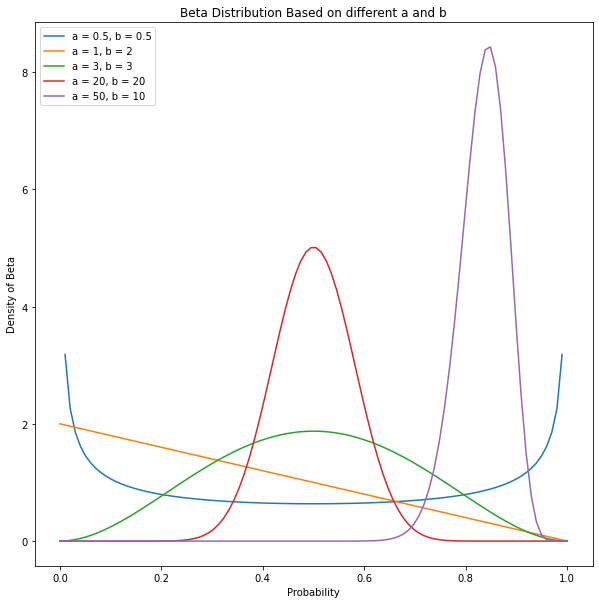

In [3]:
x = np.linspace(0,1,100)
lst_a = [0.5, 1, 3, 20, 50]
lst_b = [0.5, 2, 3, 20, 10]

fig, ax = plt.subplots(figsize = (10, 10))
plt.ylabel('Density of Beta')
plt.xlabel('Probliity')
for a, b in zip(lst_a, lst_b):
    df = pd.DataFrame({'Probability': x, f'a = {a}, b = {b}': beta_dist(x, a, b)})
    df.set_index('Probability') \
        .plot(ax = ax)
plt.title('Beta Distribution Based on different a and b')
plt.show()

In baseball, one of the most commonly used statistics in baseball is the
batting average, which is calculated as the number of hits (H) divided by the
number of at-bats (AB). 

If a player goes up to bat once and gets a single, his batting average is briefly 1.000, while if he strikes
out or walks, his batting average is 0.000. That's apparently not the way we estimate the player's batting average. We would estimate the batting average based on *prior expectations*, meaning batting averages in history.

The number of hits a player gets out of his at-bats is an example of a **binomial distribution**, which models a count of successes out of a total.The prior is representing, before we've seen the player take his first swing, what we roughly expect his batting average to be.

A player's season-long batting average will be most likely around 0.27, but that it could reasonably range from 0.21 to 0.35. Let's estimate the a, b of the beta distribution.

In [4]:
# Estimate parameters based on mean and variance.
u = .27
# Lets assume it's the range of 3 sigma on each side of the mean.
std = (0.35 - 0.21)/6

a = round(((1 - u)/ std**2 - 1/u) * u**2)
b = round(a * (1/u -1))
print(f'a : {a}, b : {b}')

a : 97, b : 262


In [5]:
def draw_beta_dist(a,b):
    """
    Draw the beta distribution based on a and b.
    """
    x = np.linspace(0,1,100)
    df = pd.DataFrame({'Probability': x, f'a = {a}, b = {b}': beta_dist(x, a, b)})
    df.set_index('Probability') \
        .plot(figsize = (10, 10),
              title = 'Beta Distribution Based on a and b')
    plt.ylabel('Density of Beta')
    plt.xlabel('Probliity')
    plt.show()

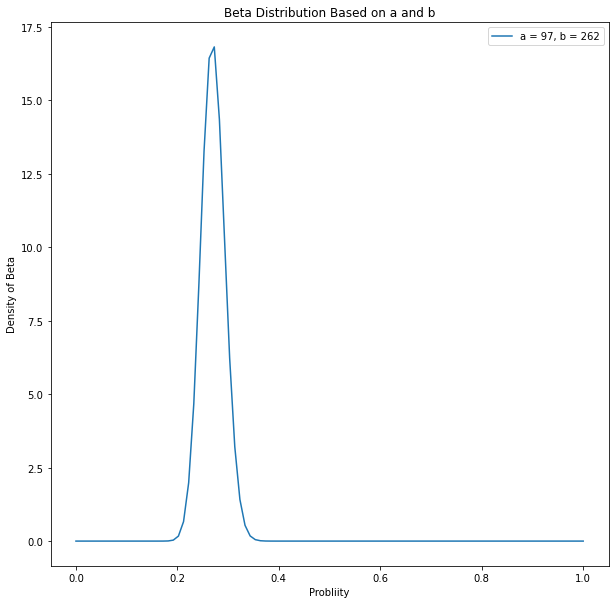

In [6]:
draw_beta_dist(a, b)

We start with a prior distribution, see some evidence, then update to a
posterior distribution. 
$B(a + hits, b + misses)$. The math can be found [here](https://en.wikipedia.org/wiki/Conjugate_prior#Example)

In our case, when the player got 1 hit, the beta distribution changes from B(a, b)(prior expectations) to B(a+1, b)(1 hit and 0 miss). The hitting average changes from 97/(97 + 262) = 0.2702 to 98/(98 + 262) = 0.2722

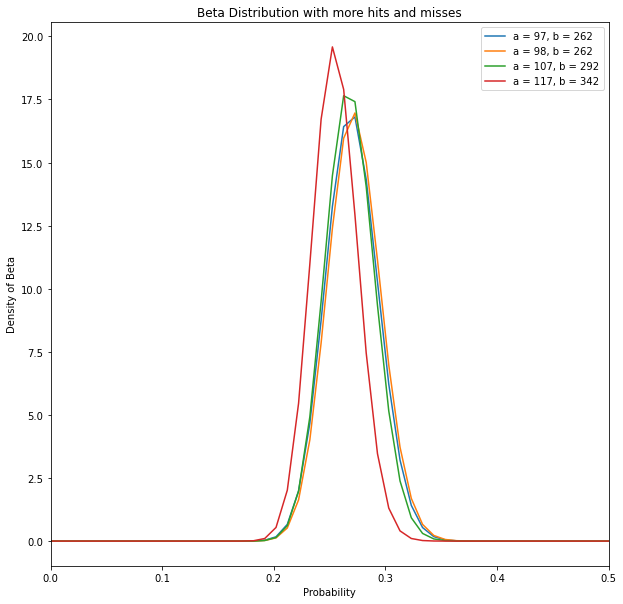

In [7]:
# Let's simulate the 4 situations 
# 1. (a,b) piror expection
# 2. (a + 1, b) hit + 1
# 3. (a + 10, b + 30) hit + 10 and miss + 30
# 4. (a + 20, b + 80) hit + 20 and miss + 80
lst_a = [a, a + 1, a + 10, a + 20]
lst_b = [b, b, b + 30, b + 80]

fig, ax = plt.subplots(figsize = (10, 10))
plt.ylabel('Density of Beta')
plt.xlabel('Probliity')
for a, b in zip(lst_a, lst_b):
    df = pd.DataFrame({'Probability': x, f'a = {a}, b = {b}': beta_dist(x, a, b)})
    df.set_index('Probability') \
        .plot(ax = ax,
              xlim = (0, 0.5))
plt.title('Beta Distribution with more hits and misses')
plt.show()